In [6]:
import pickle
import pandas as pd
with open('../lesson1/supply_chain_data.pkl', 'rb') as file:
    supply_chain_data = pickle.load(file)

In [7]:
supply_chain_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,order_year,order_month,order_week_day,order_hour,order_month_year,TotalPrice
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.75,0,2/3/2018 22:56,Standard Class,2018,1,2,22,2018-01,314.640015
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.75,0,1/18/2018 12:27,Standard Class,2018,1,5,12,2018-01,311.359985
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.75,0,1/17/2018 12:06,Standard Class,2018,1,5,12,2018-01,309.720001
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.75,0,1/16/2018 11:45,Standard Class,2018,1,5,11,2018-01,304.809998
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.75,0,1/15/2018 11:24,Standard Class,2018,1,5,11,2018-01,298.250000


In [8]:
supply_chain_data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [9]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [10]:
supply_chain_data['Order Status'].unique()
#欺诈行为 => 二分类
supply_chain_data['isFraud']= (supply_chain_data['Order Status'] == 'SUSPECTED_FRAUD').apply(lambda x: 1 if x else 0)
#延迟发货 => 二分类
supply_chain_data['isDelivery'] = np.where(supply_chain_data['Delivery Status'] == 'Late delivery', 1,0)

In [11]:
#去掉没有用的列
supply_chain_data.drop(['Customer Email', 'Customer Password', 'Customer Fname','Customer Lname','Product Image'], axis=1, inplace=True)


In [12]:
#去掉'Delivery Status' ，Order Status
supply_chain_data.drop(['Order Status', 'Delivery Status'], axis=1, inplace=True)

In [13]:
for i in supply_chain_data.columns:
    print(i + ":" + str(len(supply_chain_data[i].value_counts())))

Type:4
Days for shipping (real):7
Days for shipment (scheduled):4
Benefit per order:21998
Sales per customer:2927
Late_delivery_risk:2
Category Id:51
Category Name:50
Customer City:563
Customer Country:2
Customer Id:20652
Customer Segment:3
Customer State:46
Customer Street:7458
Customer Zipcode:995
Department Id:11
Department Name:11
Latitude:11250
Longitude:4487
Market:5
Order City:3597
Order Country:164
Order Customer Id:20652
order date (DateOrders):65752
Order Id:65752
Order Item Cardprod Id:118
Order Item Discount:1017
Order Item Discount Rate:18
Order Item Id:180519
Order Item Product Price:75
Order Item Profit Ratio:162
Order Item Quantity:5
Sales:193
Order Item Total:2927
Order Profit Per Order:21998
Order Region:23
Order State:1089
Order Zipcode:609
Product Card Id:118
Product Category Id:51
Product Description:0
Product Name:118
Product Price:75
Product Status:1
shipping date (DateOrders):63701
Shipping Mode:4
order_year:4
order_month:12
order_week_day:7
order_hour:24
order_

In [14]:
supply_chain_data.drop(['Product Description', 'Product Status', 'Latitude', 'Longitude', 'Order Zipcode','Customer Street','order date (DateOrders)'], axis=1, inplace=True)

In [15]:
cat_columns = supply_chain_data.select_dtypes(include=['object']).columns
cat_columns
numerical_columns = supply_chain_data.select_dtypes(exclude=['object','period[M]']).columns

In [16]:
print(cat_columns)
print(numerical_columns)

Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')
Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Order Customer Id', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Product Card Id', 'Product Category Id',
       'Product Price', 'order_year', 'order_month', 'order_week_day',
       'order_hour', 'TotalPrice', 'isFraud', 'isDelivery'],
      dtype=

In [17]:
len(supply_chain_data.columns)

47

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data = pd.DataFrame()
for col in cat_columns:
    train_data[col] = le.fit_transform(supply_chain_data[col])
train_data[numerical_columns] = supply_chain_data[numerical_columns]

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
corr =train_data[numerical_columns].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, linewidths= .5, fmt='.1g',cmap='coolwarm')
plt.show()

<Figure size 2000x1000 with 2 Axes>

In [20]:
#根据热力图删除完全相关项
train_data.drop(['Customer Zipcode', 'Order Profit Per Order','Order Item Total','Product Category Id','Order Customer Id','Order Item Id','Product Card Id','Order Item Product Price','Late_delivery_risk'], axis=1, inplace=True)


In [21]:
from sklearn.model_selection import train_test_split
y_fraud = train_data['isFraud']
y_delivery = train_data['isDelivery']
x_fraud = train_data.loc[:,train_data.columns !='isFraud']
x_delivery = train_data.loc[:,train_data.columns !='isDelivery']
#切分数据集
x_frand_train, x_fraud_test, y_fraud_train, y_fraud_test = train_test_split(x_fraud, y_fraud, test_size=0.2)
x_delivery_train, x_delivery_test, y_delivery_train, y_delivery_test = train_test_split(x_delivery, y_delivery, test_size=0.2)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_frand_train = scaler.fit_transform(x_frand_train)
x_fraud_test = scaler.transform(x_fraud_test)
x_delivery_train = scaler.fit_transform(x_delivery_train)
x_delivery_test = scaler.transform(x_delivery_test)

In [37]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score
def model_stats(model, x_train, x_test, y_train, y_test, name):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(y_pred)
    accuracy = accuracy_score(y_pred, y_test)
    recall= recall_score(y_pred, y_test)
    confusion= confusion_matrix(y_test, y_pred)
    f1 =f1_score(y_test, y_pred)
    print('Model used:' ,name)
    print('{} Accuracy:{}%' .format(name, accuracy*100))
    print('{} recall:{}%'.format(name, recall*100))
    print('{} Confusion Matrix:\n{}'.format(name, confusion))
    print('{} F1 score:{}%'.format(name, f1*100))
    return accuracy, recall, f1, y_pred

居然发现预测isFraud的时候，如果去掉isDevlivery，预测效果奇差，recall和f1在LogisticRegression下都是0

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
models=[LogisticRegression(),LinearSVC(),RandomForestClassifier(),LinearDiscriminantAnalysis(),DecisionTreeClassifier(),GaussianNB(),KNeighborsClassifier(),XGBClassifier()]
#models=[LogisticRegression()]
models_str=['LogisticRegression','LinearSVC','RandomForest','LinearDiscriminantAnalysis','DecisionTree','GaussianNB','KNN','XGBClassifier']
#models_str=['LogisticRegression']
score_df = pd.DataFrame()
for name,model in zip(models_str,models):
    accuracy, recall, f1, y_pred= model_stats(model, x_frand_train, x_fraud_test, y_fraud_train, y_fraud_test, name)
    score_df=score_df.append({'accuracy':accuracy, 'recall':recall, 'f1':f1, 'model':name, 'type':'fraud'},ignore_index=True)
    accuracy, recall, f1,= model_stats(model, x_delivery_train, x_delivery_test, y_delivery_train, y_delivery_test, name)
    score_df=score_df.append({'accuracy':accuracy, 'recall':recall, 'f1':f1, 'model':name, 'type':'delivery'},ignore_index=True)

[0 0 0 ... 0 0 0]
Model used: LogisticRegression
LogisticRegression Accuracy:97.86173277199202%
LogisticRegression recall:56.17283950617284%
LogisticRegression Confusion Matrix:
[[35150   142]
 [  630   182]]
LogisticRegression F1 score:32.04225352112676%
[0 0 1 ... 1 1 0]
Model used: LogisticRegression
LogisticRegression Accuracy:98.90316862397518%
LogisticRegression recall:98.03288460583181%
LogisticRegression Confusion Matrix:
[[15973   396]
 [    0 19735]]
LogisticRegression F1 score:99.00667235238048%
[0 0 0 ... 0 0 0]
Model used: LinearSVC
LinearSVC Accuracy:97.7841790383337%
LinearSVC recall:52.20588235294118%
LinearSVC Confusion Matrix:
[[35162   130]
 [  670   142]]
LinearSVC F1 score:26.199261992619927%
[0 0 1 ... 1 1 0]
Model used: LinearSVC
LinearSVC Accuracy:98.90316862397518%
LinearSVC recall:98.03288460583181%
LinearSVC Confusion Matrix:
[[15973   396]
 [    0 19735]]
LinearSVC F1 score:99.00667235238048%
[0 0 0 ... 0 0 0]
Model used: RandomForest
RandomForest Accuracy:9

/Users/huangwen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[0 0 0 ... 0 0 0]
Model used: LinearDiscriminantAnalysis
LinearDiscriminantAnalysis Accuracy:97.93651672944826%
LinearDiscriminantAnalysis recall:55.41195476575121%
LinearDiscriminantAnalysis Confusion Matrix:
[[35016   276]
 [  469   343]]
LinearDiscriminantAnalysis F1 score:47.93850454227813%
[0 0 1 ... 1 1 0]
Model used: LinearDiscriminantAnalysis
LinearDiscriminantAnalysis Accuracy:98.462774207844%
LinearDiscriminantAnalysis recall:97.7637214862038%
LinearDiscriminantAnalysis Confusion Matrix:
[[15920   449]
 [  106 19629]]
LinearDiscriminantAnalysis F1 score:98.60598297038655%
[0 0 0 ... 0 0 0]
Model used: DecisionTree
DecisionTree Accuracy:98.98349213383558%
DecisionTree recall:77.84730913642053%
DecisionTree Confusion Matrix:
[[35115   177]
 [  190   622]]
DecisionTree F1 score:77.21911855990066%
[0 0 1 ... 1 1 0]
Model used: DecisionTree
DecisionTree Accuracy:99.12752049634389%
DecisionTree recall:99.41475826972011%
DecisionTree Confusion Matrix:
[[16254   115]
 [  200 19535]]


/Users/huangwen/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0 0 0 ... 0 0 0]
Model used: XGBClassifier
XGBClassifier Accuracy:97.84511411477953%
XGBClassifier recall:58.252427184466015%
XGBClassifier Confusion Matrix:
[[35206    86]
 [  692   120]]
XGBClassifier F1 score:23.575638506876228%
[0 0 1 ... 1 1 0]
Model used: XGBClassifier
XGBClassifier Accuracy:98.90316862397518%
XGBClassifier recall:98.03288460583181%
XGBClassifier Confusion Matrix:
[[15973   396]
 [    0 19735]]
XGBClassifier F1 score:99.00667235238048%


/Users/huangwen/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
score_df.groupby(['type','model'])['accuracy','recall','f1'].mean()

/Users/huangwen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


accuracy    recall        f1
type     model                                                   
delivery DecisionTree                0.991275  0.994148  0.992002
         GaussianNB                  0.568884  0.559069  0.717170
         KNN                         0.849435  0.860631  0.862588
         LinearDiscriminantAnalysis  0.984628  0.977637  0.986060
         LinearSVC                   0.989032  0.980329  0.990067
         LogisticRegression          0.989032  0.980329  0.990067
         RandomForest                0.991857  0.986147  0.992600
         XGBClassifier               0.989032  0.980329  0.990067
fraud    DecisionTree                0.989835  0.778473  0.772191
         GaussianNB                  0.878545  0.156244  0.270261
         KNN                         0.978146  0.629213  0.124306
         LinearDiscriminantAnalysis  0.979365  0.554120  0.479385
         LinearSVC                   0.977842  0.522059  0.261993
         LogisticRegression          0.978617  0.561728  0.320423
         RandomForest                0.985874  0.921788  0.564103
         XGBClassifier               0.978451  0.582524  0.235756

[27 21 23 30 29  1  6  3 25 28 19 12 18 34 24 16 17 26  7  4 31 10 32  5
  9 33  8  2 11  0 14 13 22 35 20 15]


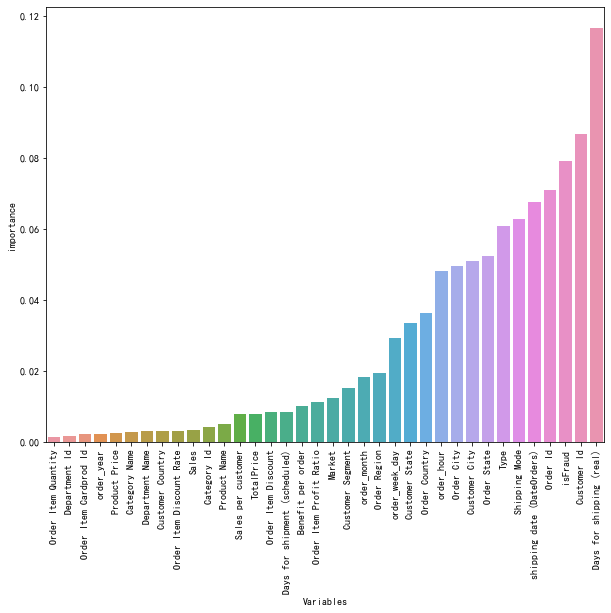

In [49]:
#用决策树对fraud模型重要特征可视化
from sklearn.tree import DecisionTreeClassifier
fraud_model = DecisionTreeClassifier()
fraud_model.fit(x_frand_train, y_fraud_train)
importance_col=fraud_model.feature_importances_.argsort()
print(importance_col)
feat_importance = pd.DataFrame({'Variables':train_data.columns[importance_col],'importance':fraud_model.feature_importances_[importance_col]})
plt.figure(figsize=(10,8))
sns.barplot(x='Variables',y='importance',data=feat_importance)
plt.xticks(rotation=90)
plt.show()


In [32]:
#神经网路进行分类
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense
#BN层
keras.layers.BatchNormalization()
classifier = keras.Sequential()
classifier.add(Dense(1024,activation='relu',input_dim=x_frand_train.shape[1]))
classifier.add(Dense(512,activation='relu'))
classifier.add(Dense(265,activation='relu'))
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(64,activation='relu'))
classifier.add(Dense(32,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#模型训练
classifier.fit(x_frand_train, y_fraud_train.values, epochs=20, batch_size=1024)

Train on 144415 samples
Epoch 1/20
144415/144415 [==============================] - 5s 33us/sample - loss: 0.0858 - accuracy: 0.9711
Epoch 2/20
144415/144415 [==============================] - 4s 27us/sample - loss: 0.0529 - accuracy: 0.9790
Epoch 3/20
144415/144415 [==============================] - 4s 27us/sample - loss: 0.0502 - accuracy: 0.9799
Epoch 4/20
144415/144415 [==============================] - 4s 26us/sample - loss: 0.0485 - accuracy: 0.9804
Epoch 5/20
144415/144415 [==============================] - 4s 27us/sample - loss: 0.0470 - accuracy: 0.9811
Epoch 6/20
144415/144415 [==============================] - 4s 27us/sample - loss: 0.0456 - accuracy: 0.9815
Epoch 7/20
144415/144415 [==============================] - 4s 26us/sample - loss: 0.0435 - accuracy: 0.9824
Epoch 8/20
144415/144415 [==============================] - 4s 26us/sample - loss: 0.0395 - accuracy: 0.9838
Epoch 9/20
144415/144415 [==============================] - 4s 27us/sample - loss: 0.0360 - accuracy: 0.

In [36]:
y_evaluate = classifier.evaluate(x_fraud_test, y_fraud_test.values)
print('test Evaluate：', y_evaluate)

36104/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test Evaluate： [0.06753685542193297, 0.9863173]


In [38]:
y_fraud_pred = classifier.predict(x_fraud_test, batch_size=512, verbose=1)
y_fraud_pred = np.argmax(y_fraud_pred, axis=1)
print(f1_score(y_fraud_pred, y_fraud_test))

36104/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0


对订货数量(Order Item Quantity)进行预测，对销售额(Sales)进行预测

In [42]:
y_quantity = train_data['Order Item Quantity']
x_quantity = train_data.loc[:,train_data.columns !='Order Item Quantity']
x_sales = train_data.loc[:,train_data.columns !='Sales']
y_sales = train_data['Sales']

#切分数据集
x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test = train_test_split(x_quantity, y_quantity, test_size=0.2)
x_sales_train, x_sales_test, y_sales_train, y_sales_test = train_test_split(x_sales, y_sales, test_size=0.2)

In [43]:
scaler = StandardScaler()
x_quantity_train = scaler.fit_transform(x_quantity_train)
x_quantity_test = scaler.transform(x_quantity_test)
x_sales_train = scaler.fit_transform(x_sales_train)
x_sales_test = scaler.transform(x_sales_test)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def regression_model_stats(model, x_train, x_test, y_train, y_test, name):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_pred, y_test)
    mse= mean_squared_error(y_pred, y_test)
    rmse= mse ** 0.5
    r2 =r2_score(y_test, y_pred)
    print('Model used:' ,name)
    print('{} MAE:{}%' .format(name, mae))
    print('{} MSE:{}%'.format(name, mse))
    print('{} RMSE:{}'.format(name, rmse))
    print('{} R Squared:{}%'.format(name,r2))
    return mae, mse, rmse, r2

In [47]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
models=[XGBRegressor(n_estimators=1000, learning_rate=0.1,  max_depth=7)]
#n_estimators=120, learning_rate=0.1, gamma=0, subsample=0.8, colsample_bytree=0.9, max_depth=7)
#models=[LinearRegression(),KNeighborsRegressor(),SVR(),Ridge(),Lasso(),MLPRegressor(alpha=20),DecisionTreeRegressor(),ExtraTreeRegressor(),XGBRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor()]
models_str=['XGBoost']
#models_str=['LinearRegression','KNNRegressor','SVR','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','XGBoost','RandomForest','AdaBoost','GradientBoost','Bagging']
regression_score_df = pd.DataFrame()
for name,model in zip(models_str,models):
    mae, mse, rmse, r2 =  regression_model_stats(model, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, name)
    regression_score_df=regression_score_df.append({'MAE':mae, 'MSE':mse, 'RMSE':rmse,'R Squared':r2, 'model':name, 'type':'quantity'},ignore_index=True)
    mae, mse, rmse, r2= regression_model_stats(model, x_sales_train, x_sales_test, y_sales_train, y_sales_test, name)
    regression_score_df=regression_score_df.append({'MAE':mae, 'MSE':mse, 'RMSE':rmse,'R Squared':r2, 'model':name, 'type':'sales'},ignore_index=True)

Model used: XGBoost
XGBoost MAE:0.00016027162503224108%
XGBoost MSE:2.3751524142200518e-05%
XGBoost RMSE:0.0048735535435860886
XGBoost R Squared:0.999988718419042%
Model used: XGBoost
XGBoost MAE:0.03308229277664149%
XGBoost MSE:0.171381743790867%
XGBoost RMSE:0.4139827819980766
XGBoost R Squared:0.9999902600345697%


In [51]:
regression_score_df.groupby(['type','model'])['MAE','MSE','RMSE','R Squared'].mean()

,,MAE,MSE,RMSE,R Squared
type,model,,,,
quantity,XGBoost,0.000160,0.000024,0.004874,0.999989
sales,XGBoost,0.033082,0.171382,0.413983,0.999990
